# Reconocimiento de Gestos con Mediapipe

## Deteccion de Puntos de Referencia Manuales

### Deteccion de Puntos de referencia en una imagen estatica

In [14]:
## Importamos las dependencias
import cv2 as cv
import mediapipe as mp
import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

#### Opciones de configuración de Parametros

- **STATIC_IMAGE_MODE:** Si se establece en `false`, la solución trata las imágenes de entrada como una transmisión de video. Intentará detectar las manos en las primeras imágenes de entrada y, tras una detección exitosa, localiza aún más los puntos de referencia manuales. En imágenes posteriores, una vez todas max_num_hands se detectan las manos y se localizan los puntos de referencia de la mano correspondiente, simplemente rastrea esos puntos de referencia sin invocar otra detección hasta que pierde el rastro de cualquiera de las manos. Esto reduce la latencia y es ideal para procesar cuadros de video. Si se establece en `true`, la detección manual se ejecuta en cada imagen de entrada, ideal para procesar un lote de imágenes estáticas, posiblemente no relacionadas. Predeterminado a `false`.

- **MAX_NUM_HANDS:** Número máximo de manos para detectar. Predeterminado a `2.`

- **MODEL_COMPLEXITY:** Complejidad del modelo de punto de referencia manual: `0 o 1`. La precisión del marcador, así como la latencia de inferencia, generalmente aumentan con la complejidad del modelo. Predeterminado a `1`.

- **MIN_DETECTION_CONFIDENCE:** Valor mínimo de confianza `([0.0, 1.0])` del modelo de detección manual para que la detección se considere exitosa. Predeterminado a 0.5.

- **MIN_TRACKING_CONFIDENCE:** Valor mínimo de confianza `([0.0, 1.0])` del modelo de seguimiento de puntos de referencia para que los puntos de referencia manuales se consideren rastreados con éxito, o de lo contrario la detección manual se invocará automáticamente en la siguiente imagen de entrada. Establecerlo en un valor más alto puede aumentar la robustez de la solución, a expensas de una latencia más alta. Ignorado si `static_image_mode` es true, donde la detección manual simplemente se ejecuta en cada imagen. Predeterminado a `0.5.`

In [7]:
# declaramos la ruta de la imagen a trabajar
img_path = "imagen.png"
# configuramos parametos de deteccion
hands = mp_hands.Hands(static_image_mode=True, 
                       max_num_hands=2,model_complexity=1, 
                       min_detection_confidence=0.8, 
                       min_tracking_confidence=0.8
                      )

A continuacion cargamos la imagen utilizando opencv, realizamos un cambio de espacio de color, y graficamos la imagen

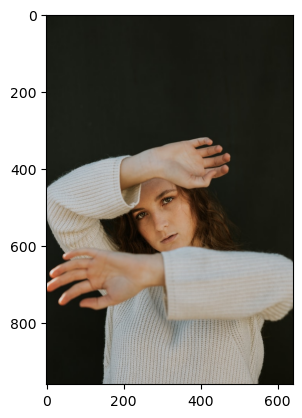

In [8]:
img = cv.imread(img_path) ## lectura de la Imagen
img = cv.cvtColor(img, cv.COLOR_BGR2RGB) ## Cambio de espacio de color
plt.imshow(img) ## mostramos la imagen 

### Mostrando los resultados

El modelo realiza la deteccion de 21 puntos importantes representados como cordenadas 3d (x,y,z), de las uniones o nudillos dentro de la region de la mano, a continuacion se muestra los 21 puntos que nos retorna el modelo.

![imagen](./hand_landmarks.png)

### Salida
El estilo de denominación puede diferir ligeramente entre plataformas / idiomas.

- **MULTI_HAND_LANDMARKS: ** Colección de manos detectadas / rastreadas, donde cada mano se representa como una lista de 21 puntos de referencia manuales y cada punto de referencia se compone de ` x, y y z`. `x y y` se normalizan a `[0.0, 1.0]` por el ancho y la altura de la imagen respectivamente. `z` representa la profundidad de referencia con la profundidad en la muñeca como origen, y cuanto menor sea el valor, más cerca estará el punto de referencia de la cámara. La magnitud de `z` usa aproximadamente la misma escala que `x`.

- **MULTI_HAND_WORLD_LANDMARKS: ** Colección de manos detectadas / rastreadas, donde cada mano se representa como una lista de `21 puntos de referencia manuales en coordenadas mundiales`. Cada punto de referencia se compone de `x, y y z`: coordenadas 3D del mundo real en metros con el origen en el centro geométrico aproximado de la mano.

- **MULTI-MANOS:** Recolección de la mano de las manos detectadas / rastreadas ( i.e. ¿Es una mano izquierda o derecha ). Cada mano está compuesta de label y score. label es una cadena de valor "Left" o "Right". score es la probabilidad estimada de la entrega prevista y siempre es mayor o igual que `0.5` ( y la mano opuesta tiene una probabilidad estimada de `1 - score)`.

Tenga en cuenta que la capacidad de entrega se determina suponiendo que la imagen de entrada esté reflejada, es decir, tomada con una cámara frontal / selfie con imágenes volteadas horizontalmente. Si no es así, intercambie la salida de entrega en la aplicación.

**Prediccion de Inferncias**

Ha continuación haciendo uso de la función `process()` la cual Procesa una imagen RGB y devuelve los puntos de referencia de la mano obtenemos los `hand landmarks` de las manos detectadas en la imagen.

In [9]:
result = hands.process(img)

### Mostrando configuración de la salida

#### Obteniendo la precision e identificando la mano

In [18]:
# si el resultado no es vacio ingresamos en el condicional
if result.multi_hand_landmarks:
    
    ## iteramos en el numero de manos detectadas
    for hand in result.multi_handedness:
        ## iteramos sobre la clasificacion de las manos la cual nos devuelve 
        ## una etiqueta, scores y la mano etiquetada.
        for id, lm in enumerate(hand.classification):
            print(int(lm.score*100)) ## impirmimos en consola la puntuación y su etiqueta
            print(lm.label) ## imprimimos la etiqueta
      

94
Right
97
Left


#### Obteniendo los marcadores

In [19]:
# si el resultado no es vacio ingresamos en el condicional
if result.multi_hand_landmarks:  
    
    for hand_landmarks in result.multi_hand_landmarks:
        print(len(hand_landmarks.landmark))
        print(hand_landmarks)

21
landmark {
  x: 0.38033217191696167
  y: 0.7051243782043457
  z: -3.479165755493341e-08
}
landmark {
  x: 0.33768588304519653
  y: 0.7492026686668396
  z: -0.018386099487543106
}
landmark {
  x: 0.2675636112689972
  y: 0.7728779315948486
  z: -0.02443518117070198
}
landmark {
  x: 0.20737193524837494
  y: 0.7808412909507751
  z: -0.03155713155865669
}
landmark {
  x: 0.15590110421180725
  y: 0.7819094657897949
  z: -0.03753920644521713
}
landmark {
  x: 0.2002509981393814
  y: 0.728416919708252
  z: 0.006722047924995422
}
landmark {
  x: 0.13465434312820435
  y: 0.7428470849990845
  z: -0.017552051693201065
}
landmark {
  x: 0.09921229630708694
  y: 0.7600491642951965
  z: -0.0418161079287529
}
landmark {
  x: 0.07226615399122238
  y: 0.7787765264511108
  z: -0.057651713490486145
}
landmark {
  x: 0.19061462581157684
  y: 0.7015093564987183
  z: 0.0007472343277186155
}
landmark {
  x: 0.11139560490846634
  y: 0.7065144777297974
  z: -0.017259500920772552
}
landmark {
  x: 0.05889280

#### Obteniendo cada punto en Particular

![imagen](./hand_landmarks.png)

In [21]:
# si el resultado no es vacio ingresamos en el condicional
if result.multi_hand_landmarks:

    for hand_landmarks in result.multi_hand_landmarks:
        # basados en la imagen anterior podemos obtener las cordenadas de cada punto en particular
        print(f'cordenadas x,y deL marcador PINKY_TIP: (',
              f'{hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].x }, '
              f'{hand_landmarks.landmark[mp_hands.HandLandmark.PINKY_TIP].y })'
              )


cordenadas x,y deL marcador PINKY_TIP: ( 0.08226080983877182, 0.6555702686309814)
cordenadas x,y deL marcador PINKY_TIP: ( 0.6612611413002014, 0.34651482105255127)


### Dibujando y Mostrando los Puntos y sus conexiones

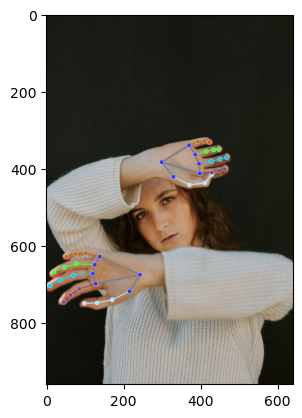

In [22]:
img_res = img.copy()

if result.multi_hand_landmarks:   
    
    for hand_landmarks in result.multi_hand_landmarks:
        mp_drawing.draw_landmarks(img_res, 
                                  hand_landmarks, 
                                  mp_hands.HAND_CONNECTIONS,
                                  mp_drawing_styles.get_default_hand_landmarks_style(),
                                  mp_drawing_styles.get_default_hand_connections_style()
                                  )
            
plt.imshow(img_res)

### Dibujando las cajas delimitadoras

[243, 216, 171, 132, 99, 128, 86, 63, 46, 121, 71, 37, 10, 126, 78, 47, 20, 139, 103, 76, 52]
xmin: 10 xmax: 243
[299, 330, 371, 411, 429, 398, 429, 448, 463, 396, 428, 450, 467, 386, 415, 434, 447, 370, 393, 409, 423]
xmin: 299 xmax: 467


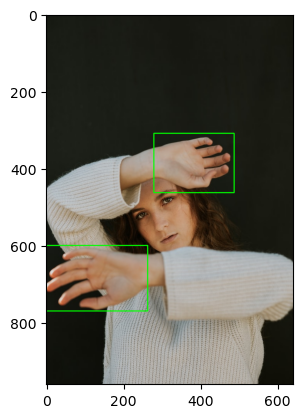

In [23]:
img_res = img.copy()
h,w,c = img_res.shape
xlist = []
ylist = []

if result.multi_hand_landmarks:
    
    for hand_landmarks in result.multi_hand_landmarks:
        xlist.clear()
        ylist.clear()
        for id, lm in enumerate(hand_landmarks.landmark):
            #print(lm)
            cx, cy = int(lm.x * w), int(lm.y * h)
            xlist.append(cx)
            ylist.append(cy)
            
        print(xlist)
        
        xmin, xmax = min(xlist), max(xlist)
        print(f'xmin:', f'{xmin}', f'xmax:', f'{xmax}')
        ymin, ymax = min(ylist), max(ylist)
        
        cv.rectangle(img_res, (xmin-20, ymin-20), (xmax+20, ymax+20),(0, 255, 0), 2)
            
plt.imshow(img_res)

### Dibujando y mostrando los puntos y sus cajas delimitadoras

[243, 216, 171, 132, 99, 128, 86, 63, 46, 121, 71, 37, 10, 126, 78, 47, 20, 139, 103, 76, 52]
xmin: 10 xmax: 243
[299, 330, 371, 411, 429, 398, 429, 448, 463, 396, 428, 450, 467, 386, 415, 434, 447, 370, 393, 409, 423]
xmin: 299 xmax: 467


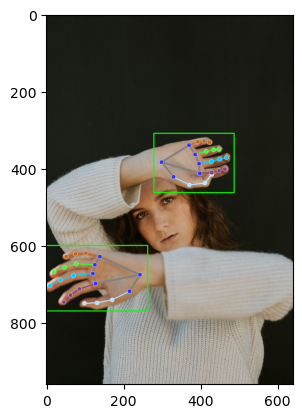

In [24]:
img_res = img.copy()
h,w,c = img_res.shape
xlist = []
ylist = []

if result.multi_hand_landmarks:
    
    for hand_landmarks in result.multi_hand_landmarks:
        #print(len(hand_landmarks.landmark))
        mp_drawing.draw_landmarks(img_res, 
                                  hand_landmarks, 
                                  mp_hands.HAND_CONNECTIONS,
                                  mp_drawing_styles.get_default_hand_landmarks_style(),
                                  mp_drawing_styles.get_default_hand_connections_style()
                                  )
        xlist.clear()
        ylist.clear()
        for id, lm in enumerate(hand_landmarks.landmark):
            #print(lm)
            cx, cy = int(lm.x * w), int(lm.y * h)
            xlist.append(cx)
            ylist.append(cy)
            
        print(xlist)
        
        xmin, xmax = min(xlist), max(xlist)
        print(f'xmin:', f'{xmin}', f'xmax:', f'{xmax}')
        ymin, ymax = min(ylist), max(ylist)
        
        cv.rectangle(img_res, (xmin-20, ymin-20), (xmax+20, ymax+20),(0, 255, 0), 2)
            
plt.imshow(img_res)

### Dibujando y mostrando los puntos, cajas delimitadoras, mano correspondiente y precisión

94
Right
97
Left
[243, 216, 171, 132, 99, 128, 86, 63, 46, 121, 71, 37, 10, 126, 78, 47, 20, 139, 103, 76, 52]
xmin: 10 xmax: 243
[299, 330, 371, 411, 429, 398, 429, 448, 463, 396, 428, 450, 467, 386, 415, 434, 447, 370, 393, 409, 423]
xmin: 299 xmax: 467


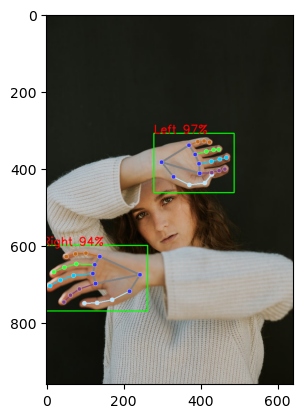

In [25]:
img_res = img.copy()
h,w,c = img_res.shape
xlist = []
ylist = []
hand_id=[]
hand_score=[]


if result.multi_hand_landmarks: 
    
    for hand in result.multi_handedness:
        
        for id, lm in enumerate(hand.classification):
            hand_id.append(lm.label)
            hand_score.append(int(lm.score*100))
            
            print(int(lm.score*100))
            print(lm.label)
    count =0
    for hand_landmarks in result.multi_hand_landmarks:
        #print(len(hand_landmarks.landmark))
        mp_drawing.draw_landmarks(img_res, 
                                  hand_landmarks, 
                                  mp_hands.HAND_CONNECTIONS,
                                  mp_drawing_styles.get_default_hand_landmarks_style(),
                                  mp_drawing_styles.get_default_hand_connections_style()
                                  )
        hands_id=""
        scores_hand=0

        xlist.clear()
        ylist.clear()
        for id, lm in enumerate(hand_landmarks.landmark):
            #print(lm)
            cx, cy = int(lm.x * w), int(lm.y * h)
            xlist.append(cx)
            ylist.append(cy)
            
        print(xlist)
        
        xmin, xmax = min(xlist), max(xlist)
        print(f'xmin:', f'{xmin}', f'xmax:', f'{xmax}')
        ymin, ymax = min(ylist), max(ylist)
        
        text = str(hand_id[count])+" "+str(hand_score[count])+"%"
        cv.rectangle(img_res, (xmin-20, ymin-20), (xmax+20, ymax+20),(0, 255, 0), 2)
        cv.putText(img_res, text, (xmin-20, ymin-20), cv.FONT_HERSHEY_SIMPLEX, 1, (255,0,0),2)
        count+=1
        
plt.imshow(img_res)

## Deteccion de Puntos de Referencia en Video

In [26]:
import cv2 as cv
import mediapipe as mp
import matplotlib.pyplot as plt
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

hands = mp_hands.Hands(min_detection_confidence=0.5, 
                       min_tracking_confidence=0.5
                      )

# creacion de ventanas para mostrar los resultados
cv.namedWindow("MediaPipe Hands", cv.WINDOW_NORMAL)

cap = cv.VideoCapture(0)

xlist = []
ylist = []
hand_id=[]
hand_score=[]

while cap.isOpened():
    
    success, frame = cap.read()
    if success:
        frame = cv.cvtColor(frame, cv.COLOR_BGR2RGB)
        result = hands.process(frame)
        img_res= frame.copy()
        h,w,c = img_res.shape
        
        if result.multi_hand_landmarks: 

            hand_id.clear()
            hand_score.clear()
            for hand in result.multi_handedness:

                for id, lm in enumerate(hand.classification):
                    hand_id.insert(0,lm.label)
                    hand_score.insert(0,int(lm.score*100))
                    
            count =0
            for hand_landmarks in result.multi_hand_landmarks:
                
                ##Dinujamos los puntos ysus conexiones
                mp_drawing.draw_landmarks(img_res, 
                                          hand_landmarks, 
                                          mp_hands.HAND_CONNECTIONS,
                                          mp_drawing_styles.get_default_hand_landmarks_style(),
                                          mp_drawing_styles.get_default_hand_connections_style()
                                          )
                xlist.clear()
                ylist.clear()
                
                ## obtenemos las cordanadas de cada punto
                for id, lm in enumerate(hand_landmarks.landmark):
                    #print(lm)
                    cx, cy = int(lm.x * w), int(lm.y * h)
                    xlist.append(cx)
                    ylist.append(cy)

                ## obtenemos los minimos y maximos de cada dimension para dibujar el rectangulo delimitador
                xmin, xmax = min(xlist), max(xlist)
                ymin, ymax = min(ylist), max(ylist)
                
                ## configuramos el texto a mostrar
                text = str(hand_id[count])+" "+str(hand_score[count])+"%"
                ## Dibujamos el rectangulo delimitador
                cv.rectangle(img_res, (xmin-20, ymin-20), (xmax+20, ymax+20),(0, 255, 0), 2)
                ## escribimos el texto
                cv.putText(img_res, text, (xmin-20, ymin-20), cv.FONT_HERSHEY_SIMPLEX, 0.5, (255,0,0),2)
                count+=1
        if cv.waitKey(5) & 0xFF == 27:
            break
        img_res = cv.cvtColor(img_res, cv.COLOR_BGR2RGB)      
        cv.imshow("MediaPipe Hands", img_res)
        
cap.release()
cv.destroyAllWindows()

### Programa Final

In [27]:
## Importacion de librerias
import cv2 as cv
import mediapipe as mp

## referenciando metodos necesarios
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_hands = mp.solutions.hands

# configurando parametros de deteccion
hands = mp_hands.Hands(max_num_hands=2,
                       min_detection_confidence=0.8, 
                       min_tracking_confidence=0.8
                      )
# creacion de ventanas para mostrar los resultados
cv.namedWindow("MediaPipe Hands", cv.WINDOW_NORMAL)

## *****************************************************************************
## Funcion para dibujar los puntos y sus conexiones
def hand_detect(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    result = hands.process(img)
    
    if result.multi_hand_landmarks: 
        
        img = draw_box(result, img)
        
        for hand_landmarks in result.multi_hand_landmarks:
            mp_drawing.draw_landmarks(img, 
                                      hand_landmarks, 
                                      mp_hands.HAND_CONNECTIONS,
                                      mp_drawing_styles.get_default_hand_landmarks_style(),
                                      mp_drawing_styles.get_default_hand_connections_style()
                                      )
    img = cv.cvtColor(img, cv.COLOR_RGB2BGR)
    
    return img
## *****************************************************************************
## Funcion para dibujar los cuadros delimitadores
def draw_box(result, img):
    
    hand_id, hand_score = score(result)
    cont =0
    for hand_landmarks in result.multi_hand_landmarks:
        xlist=[]
        ylist=[]
        for id, lm in enumerate(hand_landmarks.landmark):
            h, w, c = img.shape
            cx, cy = int(lm.x * w), int(lm.y * h)
            xlist.append(cx)
            ylist.append(cy)

        xmin, xmax = min(xlist), max(xlist)
        ymin, ymax = min(ylist), max(ylist)
        
        cv.rectangle(img, (xmin-20, ymin-20), (xmax+20, ymax+20),(0, 255, 0), 2)
        text = str(hand_id[cont])+" "+str(hand_score[cont])+"%"
        cv.putText(img, 
                    text, 
                    (xmin-20, ymin-20), 
                    cv.FONT_HERSHEY_SIMPLEX, 
                    0.5, 
                    (255,0,0),2)
        cont+=1
        
    return img

## *****************************************************************************
## Funcion para encontrar la Mano correspondiente y su porcentaje de presicion en la deteccion
def score(result):
    hand_id=[]
    hand_score = []
    for hand in result.multi_handedness:
        
        for id, lm in enumerate(hand.classification):
            hand_id.append(lm.label)
            hand_score.append(int(lm.score*100))
            
    return hand_id, hand_score
               
## *****************************************************************************
## ----------- CODIGO PRINCIPAL--------------------------
## creacion del Objeto captura de video 
cap = cv.VideoCapture(0)

while cap.isOpened():
    
    ret, frame = cap.read() 
    
    if ret:
        frame = cv.flip(frame, 1)
        img_proces = frame.copy()
        image = hand_detect(img_proces)
        cv.imshow("MediaPipe Hands", image)
        
        key = cv.waitKey(10)
        if key == 27:
            break
        
    else:
        break
            
cap.release()
cv.destroyAllWindows()
            